In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.neural_network import MLPClassifier
#read in provided data
provided_data = np.load('data/data_selected_1980_2010.npy').astype(np.float)
target = np.load('data/target_1980_2010.npy').astype(np.float)
#make it so that there is only one column in target
target = target[:,1].reshape(11300,1)
#let's split the date to train and test 
#since we have increased the number of samples required data spleat 
#will not do a good job
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(provided_data, target, test_size=0.20)
#there seems to be a problem with imbalanced target data 
#let's try to oversample under represented class with Synthetic Minority
# Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_sample(X_train, y_train)
#now it is time to normalize the data (i.e. scale it)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# give scaler some more info to work with
normalizer.fit(X_train)
#now transform the data
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)
params = [(1,1),(4,1),(25,1),(100,1),(400,1),(1,2),(4,2),(25,2),(100,2),(400,2),(1,4),(4,4),(25,4),(100,4),(400,4)]
mlp = MLPClassifier()

(1, 1)
accuracy : 0.743362831858
[[1607  557]
 [  23   73]]
             precision    recall  f1-score   support

        0.0       0.99      0.74      0.85      2164
        1.0       0.12      0.76      0.20        96

avg / total       0.95      0.74      0.82      2260



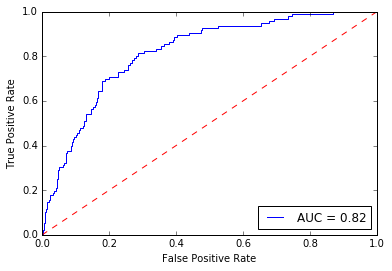

(4, 1)
accuracy : 0.69203539823
[[1486  678]
 [  18   78]]
             precision    recall  f1-score   support

        0.0       0.99      0.69      0.81      2164
        1.0       0.10      0.81      0.18        96

avg / total       0.95      0.69      0.78      2260



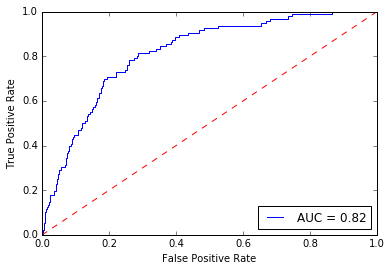

(25, 1)
accuracy : 0.581415929204
[[1248  916]
 [  30   66]]
             precision    recall  f1-score   support

        0.0       0.98      0.58      0.73      2164
        1.0       0.07      0.69      0.12        96

avg / total       0.94      0.58      0.70      2260



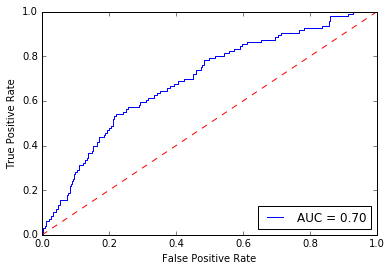

(100, 1)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plot
warnings.filterwarnings('ignore')
for param in params:
    print param
    mlp = mlp.fit(X_train, y_train)
    #let's try our model
    pred_probs = mlp.predict_proba(X_test)
    predictions = mlp.predict(X_test)
    #now is the time to evaluate how we did
    print ('accuracy : %s'% accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test,predictions))
    %matplotlib inline
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    #print(fpr)
    #print(tpr)
    #print(threshold)
    #print(roc_auc)
    #fig = plot.figure()
    #ploti = fig.add_subplot(nrows=2, ncols=3, sharex=True, sharey=True)
    #ploti.title(param)
    plot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plot.legend(loc = 'lower right')
    plot.plot([0, 1], [0, 1], 'r--')
    plot.xlim([0, 1])
    plot.ylim([0, 1])
    plot.ylabel('True Positive Rate')
    plot.xlabel('False Positive Rate')
    plot.show()
 #   plot.savefig('fig.png')